In [24]:
# !pip install plotly
# !pip install nltk
# !pip install seaborn
# !pip install imblearn

In [25]:
import pandas as pd
import numpy as np
df= pd.read_csv("SMSSpamCollection.csv", sep='\t', names=['label', 'messages'])

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/ayush/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ayush/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
df.shape

(5572, 2)

In [27]:
df.duplicated().sum()


403

In [28]:
df.drop_duplicates(keep='first', inplace=True)

In [29]:


import seaborn as sns
import matplotlib.pyplot as plt



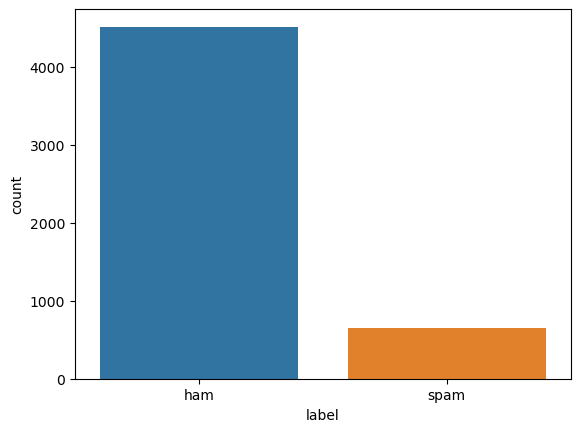

In [30]:
sns.countplot(x='label',data=df)
plt.show()


SMOTE (Synthetic Minority Over-sampling Technique) is an algorithm for oversampling in unbalanced datasets. It generates synthetic data samples of the minority class by interpolating between existing minority class instances. The algorithm selects two or more nearest neighbors of a minority class instance and then generates a synthetic sample by interpolating between the selected instances. The new samples are added to the original dataset to balance the class distribution.

In [31]:
def text_process(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [i for i in text if i not in stopwords.words('english')]
    text = [i for i in text if i not in string.punctuation]
    text = [i for i in text if i.isalnum()]
    text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return " ".join(text)


Lemmatization is a process of reducing a word to its base form, called a lemma, while considering the context in which the word appears. The goal of lemmatization is to group together different inflected forms of a word so they can be analyzed as a single item, allowing for better text analysis and natural language processing.

Lemmatization is different from stemming, which involves removing the suffixes of a word to reduce it to its root form without considering context, which often results in words with a different meaning. Lemmatization uses a dictionary or a morphological analysis to determine the correct lemma for a word.

In [32]:
temp_1 = pd.get_dummies(df['label'],drop_first=True)

In [33]:
df = pd.concat([df, temp_1], axis=1)
df.drop(columns='label', inplace=True)

In [34]:
df['Transformed_Message'] = df['messages'].apply(text_process)

In [35]:
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression

Generative models focus on the distribution of individual classes in a dataset and the learning algorithms tend to model the underlying patterns or distribution of the data points

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv =  TfidfVectorizer()

X = pd.DataFrame(tv.fit_transform(df['Transformed_Message']).toarray())

In [37]:
y=df['spam'].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [39]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
X_res,y_res=smk.fit_resample(X_train,y_train)
X_res.shape,y_res.shape
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4516, 1: 653})
Resampled dataset shape Counter({0: 3053, 1: 3053})


In [40]:

GNB = GaussianNB()
accuracy_GNB = cross_val_score(GNB, X_test, y_test, cv=5)
GNB.fit(X_res, y_res)
y_pred1 = GNB.predict(X_test)
cm1= confusion_matrix(y_test,y_pred1)
print("Confusion Matrix", confusion_matrix(y_test,y_pred1))
print("Precision Score",precision_score(y_test,y_pred1))
print("Accuracy Score:",np.mean(accuracy_GNB))
print("F1 score:",f1_score(y_test,y_pred1))
print("Train: ",GNB.score(X_train,y_train))
print("Test: ",GNB.score(X_test,y_test))
print("F1: ",f1_score(y_test,y_pred1))

Confusion Matrix [[1296  167]
 [  36  207]]
Precision Score 0.553475935828877
Accuracy Score: 0.889230162405035
F1 score: 0.6709886547811994
Train:  0.9425353739532197
Test:  0.8810082063305978
F1:  0.6709886547811994


In [41]:
MNB = MultinomialNB()
accuracy_MNB = cross_val_score(MNB, X_test, y_test, cv=5)
MNB.fit(X_res, y_res)
y_pred2 = MNB.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)
print("Confusion Matrix", confusion_matrix(y_test,y_pred2))
print("Precision Score",precision_score(y_test,y_pred2))
print("Accuracy Score:",np.mean(accuracy_MNB))
print("Train: ",MNB.score(X_train,y_train))
print("Test: ",MNB.score(X_test,y_test))
print("F1: ",f1_score(y_test,y_pred2))

Confusion Matrix [[1415   48]
 [  12  231]]
Precision Score 0.8279569892473119
Accuracy Score: 0.910323952598995
Train:  0.979497545480797
Test:  0.9648300117233294
F1:  0.885057471264368


In [42]:
BNB = BernoulliNB()
accuracy_BNB = cross_val_score(BNB, X_test, y_test, cv=5)
BNB.fit(X_res, y_res)
y_pred3 = BNB.predict(X_test)
cm3 = confusion_matrix(y_test,y_pred3)
print("Confusion Matrix", confusion_matrix(y_test,y_pred3))
print("Precision Score",precision_score(y_test,y_pred3))
print("Accuracy Score:",np.mean(accuracy_BNB))
print("Train: ",BNB.score(X_res,y_res))
print("Test: ",BNB.score(X_test,y_test))
print("F1: ",f1_score(y_test,y_pred3))

Confusion Matrix [[1463    0]
 [  34  209]]
Precision Score 1.0
Accuracy Score: 0.8915641988647082
Train:  0.992630199803472
Test:  0.9800703399765534
F1:  0.9247787610619469


In [43]:
# # Example new email message
# new_email = "You have won a free trip to Hawaii! Click here to claim your prize."

# transformed_text = text_process(new_email)
# # Preprocess and extract features from new email message
# new_email_counts = tv.transform([new_email])

# # Predict label of new email message
# new_email_pred = GNB.predict(new_email_counts)[0]

# # Print predicted label
# if new_email_pred == 'spam':
#     print("This email is spam.")
# else:
#     print("This email is not spam.")